## Phân loại rượu

### Nội dung:

* Tiền xử lý
* K-Means Clustering với kỹ thuật K selection
* Visualization of Clusters dùng PCA

In [1]:
# !pip install seaborn
import pandas as pd
pd.set_option('display.max_columns', None)
pd.options.display.float_format = "{:.2f}".format
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
data=pd.read_csv('wine-clustering.csv')
data.head()

Alcohol  Malic_Acid  Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71 2.43         15.60        127           2.80   
1    13.20        1.78 2.14         11.20        100           2.65   
2    13.16        2.36 2.67         18.60        101           2.80   
3    14.37        1.95 2.50         16.80        113           3.85   
4    13.24        2.59 2.87         21.00        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  Hue  \
0        3.06                  0.28             2.29             5.64 1.04   
1        2.76                  0.26             1.28             4.38 1.05   
2        3.24                  0.30             2.81             5.68 1.03   
3        3.49                  0.24             2.18             7.80 0.86   
4        2.69                  0.39             1.82             4.32 1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45     1480  
4   2.93      735

In [3]:
# Dữ liệu chưa được chuẩn hoá
data.describe()

Alcohol  Malic_Acid    Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
count   178.00      178.00 178.00        178.00     178.00         178.00   
mean     13.00        2.34   2.37         19.49      99.74           2.30   
std       0.81        1.12   0.27          3.34      14.28           0.63   
min      11.03        0.74   1.36         10.60      70.00           0.98   
25%      12.36        1.60   2.21         17.20      88.00           1.74   
50%      13.05        1.87   2.36         19.50      98.00           2.35   
75%      13.68        3.08   2.56         21.50     107.00           2.80   
max      14.83        5.80   3.23         30.00     162.00           3.88   

       Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
count      178.00                178.00           178.00           178.00   
mean         2.03                  0.36             1.59             5.06   
std          1.00                  0.12             0.57             2.32   
min          0.34                  0.13             0.41             1.28   
25%          1.20                  0.27             1.25             3.22   
50%          2.13                  0.34             1.56             4.69   
75%          2.88                  0.44             1.95             6.20   
max          5.08                  0.66             3.58            13.00   

         Hue  OD280  Proline  
count 178.00 178.00   178.00  
mean    0.96   2.61   746.89  
std     0.23   0.71   314.91  
min     0.48   1.27   278.00  
25%     0.78   1.94   500.50  
50%     0.96   2.78   673.50  
75%     1.12   3.17   985.00  
max     1.71   4.00  1680.00

## Chuẩn hoá dữ liệu

In [4]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
data_cluster=data.copy()
data_cluster[data_cluster.columns]=std_scaler.fit_transform(data_cluster)
data_cluster.describe()

Alcohol  Malic_Acid    Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
count   178.00      178.00 178.00        178.00     178.00         178.00   
mean     -0.00       -0.00  -0.00         -0.00      -0.00           0.00   
std       1.00        1.00   1.00          1.00       1.00           1.00   
min      -2.43       -1.43  -3.68         -2.67      -2.09          -2.11   
25%      -0.79       -0.66  -0.57         -0.69      -0.82          -0.89   
50%       0.06       -0.42  -0.02          0.00      -0.12           0.10   
75%       0.84        0.67   0.70          0.60       0.51           0.81   
max       2.26        3.11   3.16          3.15       4.37           2.54   

       Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
count      178.00                178.00           178.00           178.00   
mean        -0.00                  0.00            -0.00             0.00   
std          1.00                  1.00             1.00             1.00   
min         -1.70                 -1.87            -2.07            -1.63   
25%         -0.83                 -0.74            -0.60            -0.80   
50%          0.11                 -0.18            -0.06            -0.16   
75%          0.85                  0.61             0.63             0.49   
max          3.06                  2.40             3.49             3.44   

         Hue  OD280  Proline  
count 178.00 178.00   178.00  
mean    0.00   0.00    -0.00  
std     1.00   1.00     1.00  
min    -2.09  -1.90    -1.49  
25%    -0.77  -0.95    -0.78  
50%     0.03   0.24    -0.23  
75%     0.71   0.79     0.76  
max     3.30   1.96     2.97

#### Sử dụng Principal Component Analysis để giảm chiều dữ liệu

In [5]:
from sklearn.decomposition import PCA
pca_2 = PCA(3)
pca_2_result = pca_2.fit_transform(data_cluster)
# print(pca_2_result)
# print ('2 principal components: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))

#### Sửu dụng thuật toán K-means, chọn K cluster:
### Tính toán các inertias và silhouette score

100%|██████████| 8/8 [00:00<00:00, 27.93it/s]


{2: 0.26831340971052126, 3: 0.2848589191898987, 4: 0.25173343011696475, 5: 0.2011400251987226, 6: 0.19769008786246292, 7: 0.14914745729454645, 8: 0.20099445233447613, 9: 0.13801062769162653}


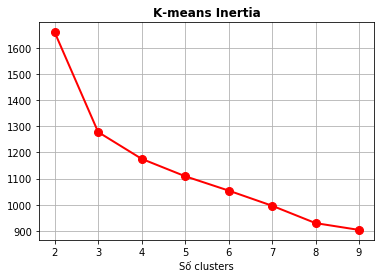

In [6]:
import sklearn.cluster as cluster
from sklearn.metrics import silhouette_score
silhouette = {}
inertia = []
for i in tqdm(range(2,10)):
    kmeans = cluster.KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter=500, random_state=17)
    kmeans.fit(data_cluster)
    inertia.append(kmeans.inertia_)
    silhouette[i] = silhouette_score(data_cluster, kmeans.labels_, metric='euclidean')
# print(inertia)
print(silhouette)

plt.plot(range(2,len(inertia)+2), inertia, marker='o',lw=2,ms=8,color='red')
plt.xlabel('Số clusters')
plt.title('K-means Inertia',fontweight='bold')
plt.grid(True)

plt.show()

#### => K=3

In [7]:
kmeans = cluster.KMeans(n_clusters=3,random_state=17, init='k-means++')
kmeans_labels = kmeans.fit_predict(data_cluster)

centroids = kmeans.cluster_centers_
centroids_pca = pca_2.transform(centroids)

/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


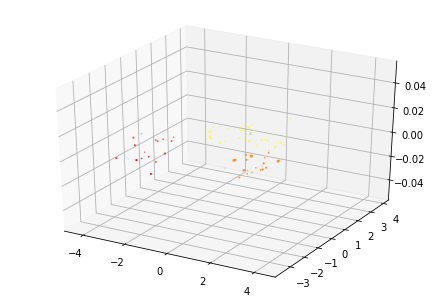

In [8]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
plt.scatter(pca_2_result[:, 0], pca_2_result[:, 1], pca_2_result[:, 2], c=kmeans_labels, cmap='autumn')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], centroids_pca[:, 2], marker='x', linewidths=3, color='green', zorder=10, lw=3)
plt.show()